# More data processing

In [1]:
import MLJ: schema, std, mean, median, coerce, coerce!, scitype
using DataFrames
using UrlDownload
using PyPlot

In [2]:
raw_data = urldownload("https://github.com/tlienart/DataScienceTutorialsData.jl/blob/master/data/wri_global_power_plant_db_be_022020.csv?raw=true")
data = DataFrame(raw_data);

In [3]:
schema(data)

┌──────────────────────────┬─────────────────────────┬──────────────────────────
│ _.names                  │ _.types                 │ _.scitypes              ⋯
├──────────────────────────┼─────────────────────────┼──────────────────────────
│ country                  │ String                  │ Textual                 ⋯
│ country_long             │ String                  │ Textual                 ⋯
│ name                     │ String                  │ Textual                 ⋯
│ gppd_idnr                │ String                  │ Textual                 ⋯
│ capacity_mw              │ Float64                 │ Continuous              ⋯
│ latitude                 │ Float64                 │ Continuous              ⋯
│ longitude                │ Float64                 │ Continuous              ⋯
│ primary_fuel             │ String                  │ Textual                 ⋯
│ other_fuel1              │ Union{Missing, String}  │ Union{Missing, Textual} ⋯
│ other_fuel2              │

In [11]:
data[1:2,[:country, :primary_fuel,:capacity_mw]]

,country,primary_fuel,capacity_mw
,String,String,Float64
1,AFG,Hydro,33.0
2,AFG,Solar,10.0


In [16]:
is_active(col) = !occursin(r"source|generation", string(col))
active_cols = [col for col in names(data) if is_active(col)]
data1 = select(data, active_cols);

In [18]:
schema(data1)

┌───────────────────────┬─────────────────────────┬─────────────────────────────
│ _.names               │ _.types                 │ _.scitypes                 ⋯
├───────────────────────┼─────────────────────────┼─────────────────────────────
│ country               │ String                  │ Textual                    ⋯
│ country_long          │ String                  │ Textual                    ⋯
│ name                  │ String                  │ Textual                    ⋯
│ gppd_idnr             │ String                  │ Textual                    ⋯
│ capacity_mw           │ Float64                 │ Continuous                 ⋯
│ latitude              │ Float64                 │ Continuous                 ⋯
│ longitude             │ Float64                 │ Continuous                 ⋯
│ primary_fuel          │ String                  │ Textual                    ⋯
│ other_fuel1           │ Union{Missing, String}  │ Union{Missing, Textual}    ⋯
│ other_fuel2           │ Un

In [19]:
is_active(col) = !occursin(r"source|generation", string(col))
active_cols = [col for col in names(data) if is_active(col)]
select!(data, active_cols);

In [20]:
select!(data, Not([:wepp_id, :url, :owner]))
schema(data)

┌───────────────────────┬─────────────────────────┬─────────────────────────────
│ _.names               │ _.types                 │ _.scitypes                 ⋯
├───────────────────────┼─────────────────────────┼─────────────────────────────
│ country               │ String                  │ Textual                    ⋯
│ country_long          │ String                  │ Textual                    ⋯
│ name                  │ String                  │ Textual                    ⋯
│ gppd_idnr             │ String                  │ Textual                    ⋯
│ capacity_mw           │ Float64                 │ Continuous                 ⋯
│ latitude              │ Float64                 │ Continuous                 ⋯
│ longitude             │ Float64                 │ Continuous                 ⋯
│ primary_fuel          │ String                  │ Textual                    ⋯
│ other_fuel1           │ Union{Missing, String}  │ Union{Missing, Textual}    ⋯
│ other_fuel2           │ Un

In [21]:
describe(data)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,country,,AFG,,ZWE,0
2,country_long,,Afghanistan,,Zimbabwe,0
3,name,,'Muela,,\u200bVärtaverket,0
4,gppd_idnr,,ARG0000001,,WRI1075863,0
5,capacity_mw,168.993,1.0,18.3,22500.0,0
6,latitude,32.5014,-77.847,39.5835,71.292,0
7,longitude,-4.1955,-179.978,-1.2744,179.389,0
8,primary_fuel,,Biomass,,Wind,0
9,other_fuel1,,Biomass,,Wind,31680


In [28]:
scitype(data)

ScientificTypes.Table{Union{AbstractVector{ScientificTypes.Continuous}, AbstractVector{ScientificTypes.Textual}, AbstractVector{Union{Missing, ScientificTypes.Textual}}, AbstractVector{Union{Missing, ScientificTypes.Continuous}}, AbstractVector{Union{Missing, ScientificTypes.Count}}}}

In [29]:
capacity = select(data, [:country, :primary_fuel, :capacity_mw]);
first(capacity, 5)

,country,primary_fuel,capacity_mw
,String,String,Float64
1,AFG,Hydro,33.0
2,AFG,Solar,10.0
3,AFG,Solar,10.0
4,AFG,Hydro,66.0
5,AFG,Hydro,100.0


In [30]:
cap_gr = groupby(capacity, [:country, :primary_fuel])

,country,primary_fuel,capacity_mw
,String,String,Float64
1,AFG,Hydro,33.0
2,AFG,Hydro,66.0
3,AFG,Hydro,100.0
4,AFG,Hydro,11.55
5,AFG,Hydro,6.0
6,AFG,Hydro,22.0
,country,primary_fuel,capacity_mw
,String,String,Float64
1,ZWE,Coal,920.0


In [32]:
cap_mean = combine(cap_gr, :capacity_mw =>mean)
cap_sum = combine(cap_gr, :capacity_mw =>sum)
first(cap_sum,30)


,country,primary_fuel,capacity_mw_sum
,String,String,Float64
1,AFG,Hydro,238.55
2,AFG,Solar,20.0
3,AFG,Gas,42.0
4,ALB,Hydro,1431.0
5,ALB,Other,98.0
6,DZA,Hydro,24.0
7,DZA,Solar,670.8
8,DZA,Gas,15179.0
9,AGO,Hydro,770.6


In [33]:
ctry_selec = r"BEL|FRA|DEU"
tech_selec = r"Solar"

r"Solar"

In [34]:
cap_sum_plot = cap_sum[occursin.(ctry_selec, cap_sum.country) .& occursin.(tech_selec, cap_sum.primary_fuel), :]

,country,primary_fuel,capacity_mw_sum
,String,String,Float64
1,BEL,Solar,116.2
2,FRA,Solar,4910.42
3,DEU,Solar,6770.56


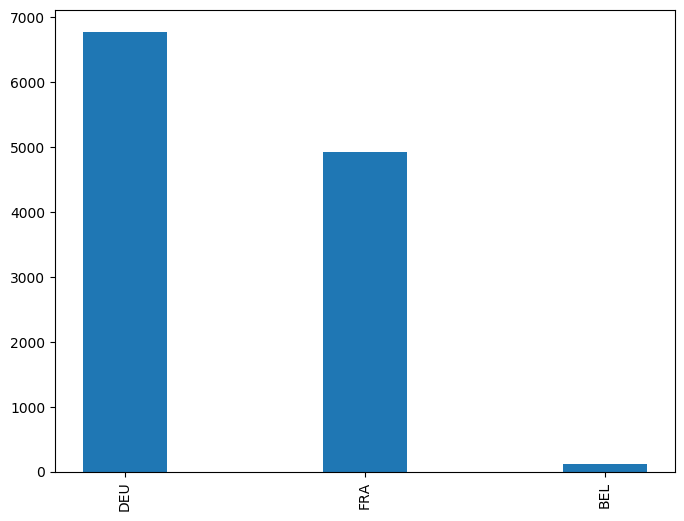

([0, 1, 2], PyCall.PyObject[PyObject Text(0, 0, 'DEU'), PyObject Text(1, 0, 'FRA'), PyObject Text(2, 0, 'BEL')])

In [35]:
sort!(cap_sum_plot, :capacity_mw_sum, rev=true)

figure(figsize=(8,6))

plt.bar(cap_sum_plot.country, cap_sum_plot.capacity_mw_sum, width=0.35)
plt.xticks(rotation=90)

In [36]:
cap_sum_ctry_gd = groupby(capacity, [:country]);
cap_sum_ctry = combine(cap_sum_ctry_gd, :capacity_mw => sum);

In [37]:
cap_sum = DataFrame(cap_sum);
cap_sum_ctry = DataFrame(cap_sum_ctry);
cap_share = leftjoin(cap_sum, cap_sum_ctry, on = :country, makeunique = true)
cap_share.capacity_mw_share = cap_share.capacity_mw_sum ./ cap_share.capacity_mw_sum_1;

In [38]:
nMissings = length(findall(x -> ismissing(x), data.commissioning_year))

17340

In [39]:
nMissings_share = nMissings/size(data)[1]

0.515411824153613

In [40]:
typeof(data.commissioning_year)

Vector{Union{Missing, Float64}} (alias for Array{Union{Missing, Float64}, 1})

In [41]:
data_nmiss = dropmissing(data, :commissioning_year);

In [42]:
map!(x -> round(x, digits=0), data_nmiss.commissioning_year, data_nmiss.commissioning_year);

# We can now calculate plant age for each plant (worth remembering that the dataset only contains active plants)

current_year = fill!(Array{Float64}(undef, size(data_nmiss)[1]), 2020);
data_nmiss[:, :plant_age] = current_year - data_nmiss[:, :commissioning_year];

In [43]:
mean_age = mean(skipmissing(data_nmiss.plant_age))
median_age = median(skipmissing(data_nmiss.plant_age))

15.0

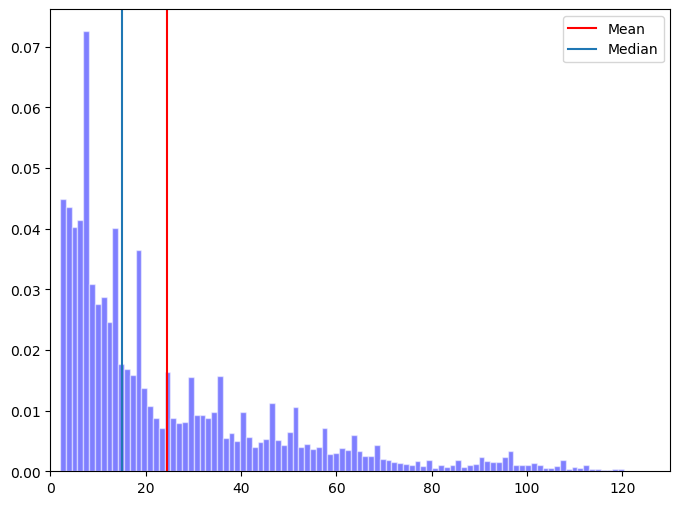

(0, 130.1)

In [44]:
figure(figsize=(8,6))

plt.hist(data_nmiss.plant_age, color="blue", edgecolor="white", bins=100,
      density=true, alpha=0.5)
plt.axvline(mean_age, label = "Mean", color = "red")
plt.axvline(median_age, label = "Median")

plt.legend()

plt.xlim(0,)

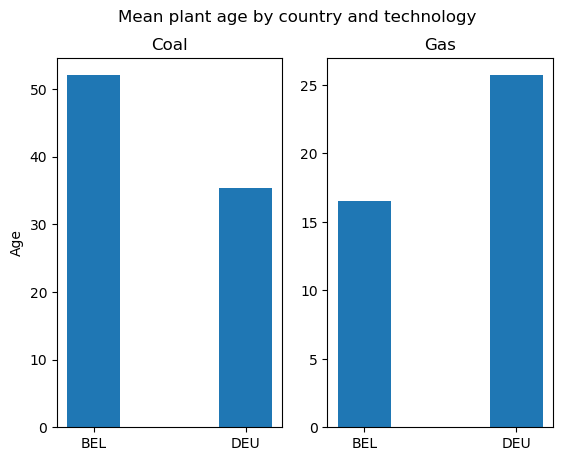

PyObject Text(0.5, 1, 'Gas')

In [45]:
age = select(data_nmiss, [:country, :primary_fuel, :plant_age])
age_mean = combine(groupby(age, [:country, :primary_fuel]), :plant_age => mean)

coal_means = age_mean[occursin.(ctry_selec, age_mean.country) .& occursin.(r"Coal", age_mean.primary_fuel), :]
gas_means = age_mean[occursin.(ctry_selec, age_mean.country) .& occursin.(r"Gas", age_mean.primary_fuel), :]

width = 0.35  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle("Mean plant age by country and technology")

ax1.bar(coal_means.country, coal_means.plant_age_mean, width, label="Coal")
ax2.bar(gas_means.country, gas_means.plant_age_mean, width, label="Gas")

ax1.set_ylabel("Age")

ax1.set_title("Coal")
ax2.set_title("Gas")